### The supervised model will predict the frequency of inflow of CitiBikes bikes at a particular station at any point in the day


In [1]:
# Importing the libraries for Google Drive
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
# Getting authentication from the google drive 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# Importing all the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import sys, math, os
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score    
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import svm
sys.path.append("..")
from sklearn.svm import SVC
from sklearn import metrics
import datetime as dt
%matplotlib inline
sns.set(style='ticks', palette='Set2')
from datetime import date 
import holidays 

# Merge the dataframe

In [4]:
# Filtering the data of 'Pershing Square North' Station from all CSV files and merging the data 

links = ['https://drive.google.com/open?id=1xbrdf8HSpRxwMxer7E3KrVZLAiBd0iFX','https://drive.google.com/open?id=1SQKc-Rmnhy9Fjl7TJQfRfvhXeR_S7Dgz','https://drive.google.com/open?id=1Vn_ClTK-a_qI8TcL_I_S0Q8ActIVY9p_','https://drive.google.com/open?id=12j1vGHmwAv_JmVjKjhVNfbk3teVqpkFy','https://drive.google.com/open?id=1RUqLFcvUYqqNWhRDdExmn-2mRy9DUX0u','https://drive.google.com/open?id=101pMEtzouYBOq6k80527JNM2A9dhlXQu','https://drive.google.com/open?id=1Asl-xwqIX7e5ARWCnQeI4fMDGHgpI7g1','https://drive.google.com/open?id=106ag3ruckNmPMVJO2eYva6Qar2T7E2Ve','https://drive.google.com/open?id=126nWddO6Hr3O2yF1WgEPz3KO4L8A0wJi','https://drive.google.com/open?id=1UqWnyZtBHgu7Hmo6rP1HjK0x0aY96vLo','https://drive.google.com/open?id=1ogu2Hb8ErOY5_SFwEkWOD8pvMymCgv7Q','https://drive.google.com/open?id=1z0OJIDkzwuZZpeHiPD4qLnkN7Y-BmCea']
df = None
station_name = 'Pershing Square North'.lower()
for i in links:
  fluff, id = i.split('=')
  downloaded = drive.CreateFile({'id': id})
  downloaded.GetContentFile('citi_bike_data.csv')
  if df is None:
    df = pd.read_csv('citi_bike_data.csv')
    df = df[ (df['end station name'].str.lower() == station_name)] 
    print(i, "-", df.shape)
  else:
    new = pd.read_csv('citi_bike_data.csv')
    new = new[ (new['end station name'].str.lower() == station_name)] 
    df = pd.concat([df, new])
    print(i, "-", new.shape, df.shape)
print(df.shape)

https://drive.google.com/open?id=1xbrdf8HSpRxwMxer7E3KrVZLAiBd0iFX - (8905, 15)
https://drive.google.com/open?id=1SQKc-Rmnhy9Fjl7TJQfRfvhXeR_S7Dgz - (8193, 15) (17098, 15)
https://drive.google.com/open?id=1Vn_ClTK-a_qI8TcL_I_S0Q8ActIVY9p_ - (10919, 15) (28017, 15)
https://drive.google.com/open?id=12j1vGHmwAv_JmVjKjhVNfbk3teVqpkFy - (13548, 15) (41565, 15)
https://drive.google.com/open?id=1RUqLFcvUYqqNWhRDdExmn-2mRy9DUX0u - (14600, 15) (56165, 15)
https://drive.google.com/open?id=101pMEtzouYBOq6k80527JNM2A9dhlXQu - (14696, 15) (70861, 15)
https://drive.google.com/open?id=1Asl-xwqIX7e5ARWCnQeI4fMDGHgpI7g1 - (16124, 15) (86985, 15)
https://drive.google.com/open?id=106ag3ruckNmPMVJO2eYva6Qar2T7E2Ve - (16455, 15) (103440, 15)
https://drive.google.com/open?id=126nWddO6Hr3O2yF1WgEPz3KO4L8A0wJi - (16745, 15) (120185, 15)
https://drive.google.com/open?id=1UqWnyZtBHgu7Hmo6rP1HjK0x0aY96vLo - (16269, 15) (136454, 15)
https://drive.google.com/open?id=1ogu2Hb8ErOY5_SFwEkWOD8pvMymCgv7Q - (11587, 15) 

In [6]:
print(df.shape)

(155536, 15)


In [7]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1.555360e+05,155536.000000,155536.000000,155536.000000,155536.0,1.555360e+05,155536.000000,155536.000000,155536.000000,155536.000000
mean,7.980490e+02,1160.069656,40.746814,-73.986147,519.0,4.075187e+01,-73.977706,29811.068865,1977.179817,1.085536
std,6.745241e+03,1278.895098,0.015493,0.012251,0.0,3.220240e-07,0.000002,7362.784322,12.106684,0.397925
min,6.100000e+01,72.000000,40.661063,-74.017134,519.0,4.075187e+01,-73.977706,14529.000000,1885.000000,0.000000
25%,4.210000e+02,438.000000,40.740343,-73.993800,519.0,4.075187e+01,-73.977706,25716.000000,1968.000000,1.000000
50%,5.900000e+02,492.000000,40.747348,-73.987520,519.0,4.075187e+01,-73.977706,30954.000000,1978.000000,1.000000
75%,9.020000e+02,2003.000000,40.755136,-73.979738,519.0,4.075187e+01,-73.977706,34993.000000,1988.000000,1.000000
max,1.892299e+06,3908.000000,40.814394,-73.907744,519.0,4.075200e+01,-73.977000,42046.000000,2003.000000,2.000000


# Cleaning the dataframe

In [5]:
# Sorting the dataframe
df.sort_values("tripduration", axis = 0, ascending = True, inplace = True, na_position ='last')

# Number of trips under 90 seconds
trip = df.apply(lambda x: True if x['tripduration'] < 91 else False , axis=1)
numOfRows = len(trip[trip == True].index)
percent_del = numOfRows / len(df)
print('Number of Rows in dataframe less than 90 seconds : ', numOfRows)
print('Percentage of rows that will be deleted: ', percent_del)

Number of Rows in dataframe less than 90 seconds :  355
Percentage of rows that will be deleted:  0.0022824297911737475


In [8]:
# Drop trips that are less than 90 seconds and where start and end stations are the same
df_clean = df.drop(df[(df['tripduration'] < 91)].index)

In [9]:
# Number of trips where start and end station are the same
df_dup = df_clean[df_clean['start station id'] == df_clean['end station id']]
print (len(df_dup)/404947) 

# Look at it against the number of minutes
df_clean = df.drop(df_clean[(df_clean['start station id'] == df_clean['end station id'])].index)
df_clean.info()

0.002145959841658291
<class 'pandas.core.frame.DataFrame'>
Int64Index: 154604 entries, 993360 to 1408281
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             154604 non-null  int64  
 1   starttime                154604 non-null  object 
 2   stoptime                 154604 non-null  object 
 3   start station id         154604 non-null  float64
 4   start station name       154604 non-null  object 
 5   start station latitude   154604 non-null  float64
 6   start station longitude  154604 non-null  float64
 7   end station id           154604 non-null  float64
 8   end station name         154604 non-null  object 
 9   end station latitude     154604 non-null  float64
 10  end station longitude    154604 non-null  float64
 11  bikeid                   154604 non-null  int64  
 12  usertype                 154604 non-null  object 
 13  birth year               154604 

In [10]:
# Printing the dataframe
df = df_clean
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
993360,61,2019-04-17 12:35:34.4210,2019-04-17 12:36:35.5320,3235.0,E 41 St & Madison Ave,40.752165,-73.979922,519.0,Pershing Square North,40.751873,-73.977706,16522,Subscriber,1999,1
422152,61,2019-02-13 17:06:48.7520,2019-02-13 17:07:50.6800,519.0,Pershing Square North,40.751873,-73.977706,519.0,Pershing Square North,40.751873,-73.977706,26417,Subscriber,1990,1
555768,61,2019-03-15 18:02:32.0900,2019-03-15 18:03:33.7150,519.0,Pershing Square North,40.751873,-73.977706,519.0,Pershing Square North,40.751873,-73.977706,32816,Subscriber,1978,1
2311943,61,2019-09-29 11:59:30.1640,2019-09-29 12:00:31.7750,519.0,Pershing Square North,40.751873,-73.977706,519.0,Pershing Square North,40.751873,-73.977706,17025,Subscriber,1991,2
2188750,61,2019-08-29 19:18:14.2420,2019-08-29 19:19:16.2260,519.0,Pershing Square North,40.751873,-73.977706,519.0,Pershing Square North,40.751873,-73.977706,32971,Subscriber,1989,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679971,369471,2019-06-09 17:51:08.8430,2019-06-14 00:29:00.3440,458.0,11 Ave & W 27 St,40.751396,-74.005226,519.0,Pershing Square North,40.751873,-73.977706,32555,Customer,1969,0
66945,519145,2019-01-03 08:28:10.8890,2019-01-09 08:40:36.6370,3403.0,4 Ave & 9 St,40.670513,-73.988766,519.0,Pershing Square North,40.751873,-73.977706,33699,Subscriber,1973,2
1245415,1144883,2019-05-21 15:42:37.6480,2019-06-03 21:44:00.8690,388.0,W 26 St & 10 Ave,40.749718,-74.002950,519.0,Pershing Square North,40.751873,-73.977706,33682,Subscriber,1959,1
1176233,1210364,2019-09-16 14:20:09.2940,2019-09-30 14:32:53.8330,3534.0,Frederick Douglass Blvd & W 117 St,40.805159,-73.954692,519.0,Pershing Square North,40.751873,-73.977706,15112,Customer,1969,0


# Data Preparation - Creating Columns 

In [11]:
#Create 'date' column
df['date'] = df['starttime'].apply(lambda x:x.split(' ')[0])

# Create 'hour' Column
df["hour"] = df['starttime'].apply(lambda x: x.split()[1].split(":")[0]) 

# Create 'day' column: the value of da is from 0 to 6: Mon - Sun
df['day'] = df['date'].apply(lambda x: pd.to_datetime(x,format='%Y-%m-%d')).dt.weekday

# Change the format to datetime
df['date'] = pd.to_datetime(df['date'],format = '%Y-%m-%d')
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime']= pd.to_datetime(df['stoptime'])

In [12]:
# Create one column of Isweekend: 0-Weekday; 1-Weekend
Isweekend = []
for i in df['date']:
  num=i.weekday()
  if num < 5:
    k = 0
  else:
    k = 1   
  Isweekend.append(k)    
df['Isweekend'] = Isweekend

In [13]:
# Create one column of Isholiday: 0 - holiday; 1 - Not holiday
# Select country - USA and years = 2019
us_holidays = holidays.UnitedStates(years = 2019) 
IsHoliday = []
for i in df['date']:
  if i in us_holidays:
    IsHoliday.append(1)
  else:
    IsHoliday.append(0)  
df['IsHoliday'] = IsHoliday 

In [14]:
# Create one column of IsWorkingday: 0-Workingday; 1-Workingday
IsWorkingday = []
for i in range(len(df['Isweekend'])):
    if (df['Isweekend'].iloc[i] == 1) or (df['IsHoliday'].iloc[i] == 1):
      IsWorkingday.append('FALSE')
    else:
      IsWorkingday.append('TRUE')
print(IsWorkingday)
df['IsWorkingday'] = IsWorkingday

['TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'FALSE', 'TRUE', 'TRUE

In [15]:
df.head(100)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,hour,day,Isweekend,IsHoliday,IsWorkingday
993360,61,2019-04-17 12:35:34.421,2019-04-17 12:36:35.532,3235.0,E 41 St & Madison Ave,40.752165,-73.979922,519.0,Pershing Square North,40.751873,-73.977706,16522,Subscriber,1999,1,2019-04-17,12,2,0,0,TRUE
422152,61,2019-02-13 17:06:48.752,2019-02-13 17:07:50.680,519.0,Pershing Square North,40.751873,-73.977706,519.0,Pershing Square North,40.751873,-73.977706,26417,Subscriber,1990,1,2019-02-13,17,2,0,0,TRUE
555768,61,2019-03-15 18:02:32.090,2019-03-15 18:03:33.715,519.0,Pershing Square North,40.751873,-73.977706,519.0,Pershing Square North,40.751873,-73.977706,32816,Subscriber,1978,1,2019-03-15,18,4,0,0,TRUE
2311943,61,2019-09-29 11:59:30.164,2019-09-29 12:00:31.775,519.0,Pershing Square North,40.751873,-73.977706,519.0,Pershing Square North,40.751873,-73.977706,17025,Subscriber,1991,2,2019-09-29,11,6,1,0,FALSE
2188750,61,2019-08-29 19:18:14.242,2019-08-29 19:19:16.226,519.0,Pershing Square North,40.751873,-73.977706,519.0,Pershing Square North,40.751873,-73.977706,32971,Subscriber,1989,1,2019-08-29,19,3,0,0,TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287949,69,2019-07-05 07:51:40.489,2019-07-05 07:52:49.628,3235.0,E 41 St & Madison Ave,40.752165,-73.979922,519.0,Pershing Square North,40.751873,-73.977706,26886,Subscriber,1973,1,2019-07-05,07,4,0,0,TRUE
1941391,69,2019-06-28 10:33:24.785,2019-06-28 10:34:33.939,3235.0,E 41 St & Madison Ave,40.752165,-73.979922,519.0,Pershing Square North,40.751873,-73.977706,27452,Subscriber,1984,1,2019-06-28,10,4,0,0,TRUE
11796,69,2019-08-01 08:24:52.140,2019-08-01 08:26:01.303,3235.0,E 41 St & Madison Ave,40.752165,-73.979922,519.0,Pershing Square North,40.751873,-73.977706,38478,Subscriber,1966,1,2019-08-01,08,3,0,0,TRUE
1041623,69,2019-04-18 08:07:53.477,2019-04-18 08:09:03.220,519.0,Pershing Square North,40.751873,-73.977706,519.0,Pershing Square North,40.751873,-73.977706,29021,Subscriber,1951,1,2019-04-18,08,3,0,0,TRUE


# Weather and Precipitations Usage Analysis

In [16]:
# Importing the Weather data
weather_link = 'https://drive.google.com/open?id=1AE5SUD0DY3duqS-x3mtIyyznm3eDVh9-'
df_weather = None
fluff, id = weather_link.split('=')
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('weather.csv')
df_weather = pd.read_csv('weather.csv')

In [17]:
# Convert the 'Date' column to datetime format 
df_weather['DATE']= pd.to_datetime(df_weather['DATE']) 

# Add calculated column with the average temp = (TMAX + TMIN)/2
df_weather['COLD'] = (df_weather['TMAX'] + df_weather['TMIN'])/2

# Leave only important columns out of 'NAME','DATE', 'TEMP', 'PRCP', 'SNOW', 'PREC', 'COLD'
df_weather = df_weather.loc[:, df_weather.columns.intersection(['NAME','DATE', 'PRCP', 'COLD'])]
df_weather = df_weather.rename(columns={"PRCP": "PREC"})

In [18]:
# Create one column of Isweekend: 0-Weekday; 1-Weekend  
Isweekend = []
for i in df_weather['DATE']:
  num=i.weekday()
  if num < 5:
    k = 0
  else:
    k = 1   
  Isweekend.append(k)    
df_weather['Isweekend'] = Isweekend 

# Create one column of Isholiday: 0 - holiday; 1-Not holiday
IsHoliday = []
for i in df_weather['DATE']:
  if i in us_holidays:
    IsHoliday.append(1)
  else:
    IsHoliday.append(0)  

df_weather['IsHoliday'] = IsHoliday 

# Create one column of IsWorkingday: 0-Workingday; 1-Workingday
IsWorkingday = []
for i in range(len(df_weather['Isweekend'])):
    if (df_weather['Isweekend'].iloc[i] == 1) or (df_weather['IsHoliday'].iloc[i] == 1): # Not working Day
      IsWorkingday.append('0')
    else:
      IsWorkingday.append('1')

df_weather['IsWorkingday'] = IsWorkingday
df_weather.drop(['IsHoliday','Isweekend'], axis = 1, inplace = True)
df_weather['IsWorkingday'] = df_weather['IsWorkingday'].astype(int)
df_weather

,NAME,DATE,PREC,COLD,IsWorkingday
0,"NY CITY CENTRAL PARK, NY US",2019-01-01,0.06,48.5,0
1,"NY CITY CENTRAL PARK, NY US",2019-01-02,0.00,37.5,1
2,"NY CITY CENTRAL PARK, NY US",2019-01-03,0.00,40.5,1
3,"NY CITY CENTRAL PARK, NY US",2019-01-04,0.00,41.0,1
4,"NY CITY CENTRAL PARK, NY US",2019-01-05,0.50,44.0,0
...,...,...,...,...,...
360,"NY CITY CENTRAL PARK, NY US",2019-12-27,0.00,50.0,1
361,"NY CITY CENTRAL PARK, NY US",2019-12-28,0.00,47.0,0
362,"NY CITY CENTRAL PARK, NY US",2019-12-29,0.25,41.5,0
363,"NY CITY CENTRAL PARK, NY US",2019-12-30,0.74,39.0,1


In [19]:
# Merging the Citibike data and Weather data into a single dataframe
df_merged = pd.merge(df[['date','start station name','end station name','IsWorkingday','hour']], df_weather[['DATE','COLD','PREC']],how='left',left_on='date', right_on='DATE')
df_merged = df_merged.drop(columns='DATE')
df_merged

,date,start station name,end station name,IsWorkingday,hour,COLD,PREC
0,2019-04-17,E 41 St & Madison Ave,Pershing Square North,TRUE,12,55.5,0.01
1,2019-02-13,Pershing Square North,Pershing Square North,TRUE,17,37.0,0.08
2,2019-03-15,Pershing Square North,Pershing Square North,TRUE,18,62.0,0.39
3,2019-09-29,Pershing Square North,Pershing Square North,FALSE,11,72.5,0.00
4,2019-08-29,Pershing Square North,Pershing Square North,TRUE,19,73.0,0.00
...,...,...,...,...,...,...,...
154599,2019-06-09,11 Ave & W 27 St,Pershing Square North,FALSE,17,69.0,0.00
154600,2019-01-03,4 Ave & 9 St,Pershing Square North,TRUE,08,40.5,0.00
154601,2019-05-21,W 26 St & 10 Ave,Pershing Square North,TRUE,15,63.5,0.00
154602,2019-09-16,Frederick Douglass Blvd & W 117 St,Pershing Square North,TRUE,14,72.5,0.00


In [20]:
# Extracting the necessary features for the Inflow model
df_inflow = df_merged[df_merged['end station name'].str.lower() == station_name]
df_inflow['hour'] = df_inflow['hour'].astype(int)
df_inflow = df_inflow[['date','hour','IsWorkingday','COLD','PREC']].sort_values(by = ['date','hour']).groupby(['date', 'hour','IsWorkingday','COLD','PREC']).size().reset_index(name='inflow')
df_inflow

,date,hour,IsWorkingday,COLD,PREC,inflow
0,2019-01-01,0,FALSE,48.5,0.06,1
1,2019-01-01,1,FALSE,48.5,0.06,1
2,2019-01-01,2,FALSE,48.5,0.06,1
3,2019-01-01,6,FALSE,48.5,0.06,1
4,2019-01-01,7,FALSE,48.5,0.06,2
...,...,...,...,...,...,...
7544,2019-12-31,18,TRUE,40.5,0.02,4
7545,2019-12-31,19,TRUE,40.5,0.02,6
7546,2019-12-31,20,TRUE,40.5,0.02,1
7547,2019-12-31,22,TRUE,40.5,0.02,3


In [21]:
df_inflow.describe()

,hour,COLD,PREC,inflow
count,7549.000000,7549.000000,7549.000000,7549.000000
mean,12.608028,56.158233,0.138916,20.480064
std,6.492313,17.247719,0.309321,24.322713
min,0.000000,9.000000,0.000000,1.000000
25%,8.000000,41.000000,0.000000,4.000000
50%,13.000000,58.000000,0.000000,12.000000
75%,18.000000,71.500000,0.080000,26.000000
max,23.000000,88.500000,1.830000,174.000000


In [24]:
# Preparing a dataframe for all days of the year with each hour 
rng = pd.date_range('2019-01-01', periods=365*24, freq='H')
df_final = pd.DataFrame({ 'Date': rng }) 
df_final['date'] = [d.date() for d in df_final['Date']]
df_final['hour'] = pd.to_datetime(df_final['Date'], format='%H:%M:%S').dt.hour
df_final = df_final.drop(columns=['Date'])
df_final['date'] = df_final['date'].astype('datetime64[ns]')
df_final['hour'] = df_final['hour'].astype(int)

# Merging the above dataframe with the inflow dataframe
df_final = pd.merge(df_final, df_inflow, how='left', left_on=['date','hour'], right_on=['date','hour'])
df_final.drop('IsWorkingday', axis = 1,inplace = True)
df_final.drop('COLD', axis = 1,inplace = True)
df_final.drop('PREC', axis = 1,inplace = True)
df_final.fillna(0, inplace=True)
df_final = pd.merge(df_final, df_weather[['DATE','COLD','PREC','IsWorkingday']],how='left',left_on='date', right_on='DATE')
df_final.drop('DATE', axis = 1,inplace = True)

# For exhaustive dataframe (df_model) - Convert categorical variable into dummy/indicator variables
df_final = pd.get_dummies(df_final, drop_first = True)
df_model = df_final
# Also, adding month column based on date column
df_model['month'] = df_model['date'].apply(lambda x:pd.to_datetime(x,format='%Y-%m-%d')).dt.month 
df_model

,date,hour,inflow,COLD,PREC,IsWorkingday,month
0,2019-01-01,0,1.0,48.5,0.06,0,1
1,2019-01-01,1,1.0,48.5,0.06,0,1
2,2019-01-01,2,1.0,48.5,0.06,0,1
3,2019-01-01,3,0.0,48.5,0.06,0,1
4,2019-01-01,4,0.0,48.5,0.06,0,1
...,...,...,...,...,...,...,...
8755,2019-12-31,19,6.0,40.5,0.02,1,12
8756,2019-12-31,20,1.0,40.5,0.02,1,12
8757,2019-12-31,21,0.0,40.5,0.02,1,12
8758,2019-12-31,22,3.0,40.5,0.02,1,12


In [25]:
df_model.describe()

,hour,inflow,COLD,PREC,IsWorkingday,month
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,11.500000,17.648858,55.710959,0.145288,0.687671,6.526027
std,6.922582,23.659566,17.295159,0.315868,0.463470,3.448048
min,0.000000,0.000000,9.000000,0.000000,0.000000,1.000000
25%,5.750000,2.000000,41.000000,0.000000,0.000000,4.000000
50%,11.500000,9.000000,57.000000,0.000000,1.000000,7.000000
75%,17.250000,22.000000,71.000000,0.080000,1.000000,10.000000
max,23.000000,174.000000,88.500000,1.830000,1.000000,12.000000


In [26]:
# Preparing the bins for number of inflow of the bikes
listbins = [0, 5, 12, 1000000]
inflow_label = ['0-5','6-12','More than 12']

In [27]:
# Adding bins to the df_model dataframe based on the number of inflow of bikes
df_model['grouped_inflow'] = pd.cut(df_model['inflow'], bins=listbins, labels=inflow_label, include_lowest=True) 

# Model Development

The chosen models are easier to train/test and tune the complexity level to avoid overfitting of the data. 

3 categories for Target variable:
1. 0-5 bikes per hour
2. 6-12 bikes per hour
3. more than 12 bikes per hour

In [28]:
np.random.seed(42)
features = ['hour','IsWorkingday','COLD','PREC','month']
X = df_model[features]
Y = df_model['grouped_inflow']

#Dividing the dataset into 80% training set and 20% test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [29]:
# Counting the number of occurences of bikes in each bins
df_model['grouped_inflow'].groupby(df_model['grouped_inflow']).count()

grouped_inflow
0-5             3469
6-12            1655
More than 12    3636
Name: grouped_inflow, dtype: int64

**1. Logistic Regression:** 

It describes a relationship between dependent and independent variables using logistic model. It predicts a class for an instance by computing the probability that an instance belongs to each class. The classifiers pick the class with the highest probability and returns the class label for the target variable. 

I used this because it was easier to expand to multiple target classes.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Accuracy on testing = 0.5942


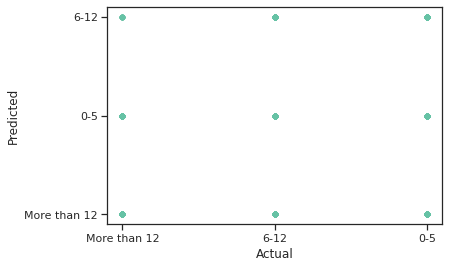

In [30]:
regressor = LogisticRegression(max_iter=5000)  
regressor.fit(X_train, Y_train)

Y_pred = regressor.predict(X_test)

print ("Accuracy on testing = %.4f" % accuracy_score(regressor.predict(X_test), Y_test) )

df_new = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df_new.plot(kind="scatter", x='Actual', y='Predicted')


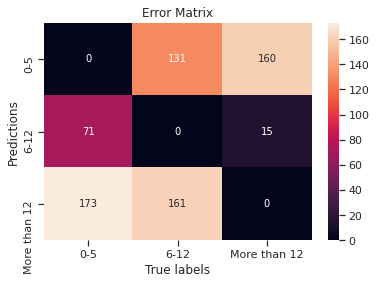

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

tick_labels = ['0-5','6-12','More than 12']

def plot_matrix(mat, title, remove_diagonal=True):
    error_mat = mat.copy()
    if remove_diagonal:
        diag_ixs = np.arange(mat.shape[0])
        error_mat[diag_ixs, diag_ixs] = 0
    sns.heatmap(error_mat, annot=True, fmt='d', yticklabels=tick_labels, xticklabels=tick_labels)
    plt.ylabel('Predictions')
    plt.xlabel('True labels')
    plt.title(title)

random_predictions = np.random.choice(range(len(Y_test)), len(Y))
random_conf_mat = confusion_matrix(regressor.predict(X_test), Y_test)
plot_matrix(random_conf_mat, 'Error Matrix', remove_diagonal=True)

**2. Decision Tree Classifier:**

It is in form of trees that are incrementally updated by splitting the dataset into smaller datasets and we can without a need to re-train results in the leaf nodes. 

I used this because it needs low level of data preparation (normalization or scaling) and it is able to distinguish classes without large errors (less misclassification).

In [32]:
from sklearn import tree
from sklearn.metrics import accuracy_score
for i in range(1,30):
  clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=i)
  clf = clf.fit(X_train, Y_train)
  print("When i is " + str(i))
  print ("Accuracy on testing = %.4f" % accuracy_score(clf.predict(X_test), Y_test)) 

When i is 1
Accuracy on testing = 0.6564
When i is 2
Accuracy on testing = 0.7340
When i is 3
Accuracy on testing = 0.7494
When i is 4
Accuracy on testing = 0.7705
When i is 5
Accuracy on testing = 0.7694
When i is 6
Accuracy on testing = 0.7894
When i is 7
Accuracy on testing = 0.8139
When i is 8
Accuracy on testing = 0.8088
When i is 9
Accuracy on testing = 0.8065
When i is 10
Accuracy on testing = 0.8082
When i is 11
Accuracy on testing = 0.8059
When i is 12
Accuracy on testing = 0.8025
When i is 13
Accuracy on testing = 0.7922
When i is 14
Accuracy on testing = 0.7951
When i is 15
Accuracy on testing = 0.7888
When i is 16
Accuracy on testing = 0.7831
When i is 17
Accuracy on testing = 0.7791
When i is 18
Accuracy on testing = 0.7780
When i is 19
Accuracy on testing = 0.7763
When i is 20
Accuracy on testing = 0.7745
When i is 21
Accuracy on testing = 0.7763
When i is 22
Accuracy on testing = 0.7745
When i is 23
Accuracy on testing = 0.7740
When i is 24
Accuracy on testing = 0.7785
W

In [33]:
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=9)
clf = clf.fit(X_train, Y_train)
print ("Accuracy on testing = %.4f" % accuracy_score(clf.predict(X_test), Y_test)) 

Accuracy on testing = 0.8059


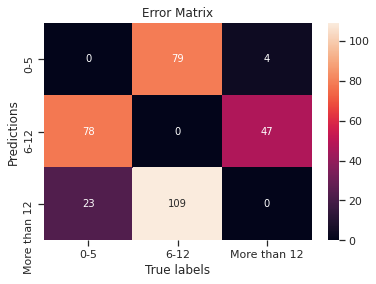

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

tick_labels = ['0-5','6-12','More than 12']

def plot_matrix(mat, title, remove_diagonal=True):
    error_mat = mat.copy()
    if remove_diagonal:
        diag_ixs = np.arange(mat.shape[0])
        error_mat[diag_ixs, diag_ixs] = 0
    sns.heatmap(error_mat, annot=True, fmt='d', yticklabels=tick_labels, xticklabels=tick_labels)
    plt.ylabel('Predictions')
    plt.xlabel('True labels')
    plt.title(title)

random_predictions = np.random.choice(range(len(Y_test)), len(Y))
random_conf_mat = confusion_matrix(clf.predict(X_test), Y_test)
plot_matrix(random_conf_mat, 'Error Matrix', remove_diagonal=True)

**3. KNN:**

It stores all available classes and classifies an instance based on a similarity/distance measure. (Manhattan/Euclidean).

I used this because here the data could be added at will without a need to re-train the model since It performs the on spot and instance-based learning.

In [35]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,20):
  Knnmodel = KNeighborsClassifier(n_neighbors=i)
  Knnmodel.fit(X_train,Y_train)
  print("When i is " + str(i))
  print ("Accuracy on testing = %.4f" % accuracy_score(Knnmodel.predict(X_test), Y_test) )

When i is 1
Accuracy on testing = 0.7409
When i is 2
Accuracy on testing = 0.7255
When i is 3
Accuracy on testing = 0.7745
When i is 4
Accuracy on testing = 0.7666
When i is 5
Accuracy on testing = 0.7768
When i is 6
Accuracy on testing = 0.7723
When i is 7
Accuracy on testing = 0.7774
When i is 8
Accuracy on testing = 0.7740
When i is 9
Accuracy on testing = 0.7711
When i is 10
Accuracy on testing = 0.7660
When i is 11
Accuracy on testing = 0.7711
When i is 12
Accuracy on testing = 0.7643
When i is 13
Accuracy on testing = 0.7677
When i is 14
Accuracy on testing = 0.7666
When i is 15
Accuracy on testing = 0.7637
When i is 16
Accuracy on testing = 0.7614
When i is 17
Accuracy on testing = 0.7574
When i is 18
Accuracy on testing = 0.7568
When i is 19
Accuracy on testing = 0.7574


In [36]:
from sklearn.neighbors import KNeighborsClassifier
Knnmodel = KNeighborsClassifier(n_neighbors=3)
Knnmodel.fit(X_train,Y_train)
print ("Accuracy on testing = %.4f" % accuracy_score(Knnmodel.predict(X_test), Y_test) )

Accuracy on testing = 0.7745


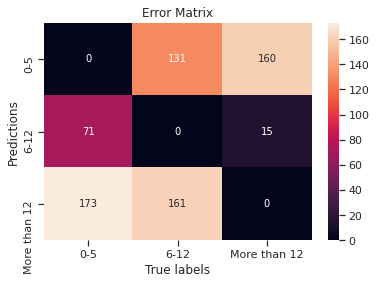

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

tick_labels = ['0-5','6-12','More than 12']

def plot_matrix(mat, title, remove_diagonal=True):
    error_mat = mat.copy()
    if remove_diagonal:
        diag_ixs = np.arange(mat.shape[0])
        error_mat[diag_ixs, diag_ixs] = 0
    sns.heatmap(error_mat, annot=True, fmt='d', yticklabels=tick_labels, xticklabels=tick_labels)
    plt.ylabel('Predictions')
    plt.xlabel('True labels')
    plt.title(title)

random_predictions = np.random.choice(range(len(Y_test)), len(Y))
random_conf_mat = confusion_matrix(regressor.predict(X_test), Y_test)
plot_matrix(random_conf_mat, 'Error Matrix', remove_diagonal=True)